### Preparing Data

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [3]:
df = pd.read_csv('wine.csv', header=None)


In [4]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [5]:
display(df.head())


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [6]:
X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values


In [7]:
# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [8]:
print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


### Training the Model

We have already decided our model to be the decision trees, so let's proceed to the training step. The Scikit-learn package provides the off-the-shelf implementation of various machine learning models/algorithms, including the decision trees. We can simply use it to build a decision tree for our training set:

In [10]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

NOTE: you are not required to standardize the data features before building a decision tree (or a random forest) because the information gain of a cutting point does not change when we scale values of an attribute.

In [11]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


Voila, Gold Folks....We get a 96% accuracy. Without much effort....isn't that pretty good!

### Visualising the Model

Decision trees are an attractive model if we care about the interpretability of a model. By visualizing a tree, we can understand how a prediction is made by breaking down a classification rule into a series of questions about the data features.

A nice feature of the DecisionTreeClassifier in Scikit-learn is that it allows us to export the decision tree as a .dot file after training, which we can visualize using the GraphViz program. This program is freely available on Linux, Windows, and Mac OS X. For exmaple, if you have Anaconda installed, you can get GraphViz by simply executing the following command in command line:

> conda install graphviz

After installing GraphViz, we can create the tree.dot file:

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', 
                feature_names=X.columns.values)

As we can see, the criterion 'Flavanoids<=1.575' is effective in separating the data points of the first class from those of the third class. By looking into the other criteria, we also know how to separate data points of the second class from the rests.

### Random Forests

### Now lets start the Random Forest training

In [14]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [16]:
y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

Accuracy (forest): 0.98


### Computing Feature Importance

In addition to classification, a random forest can be used to calculate the feature importance. Using a random forest, we can measure feature importance as the averaged information gain (impurity decrease) computed from all decision trees in the forest.

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
 3) Proline                        0.158390
 4) Color intensity                0.154620
 5) Alcohol                        0.102004
 6) Hue                            0.065470
 7) Total phenols                  0.049602
 8) Alcalinity of ash              0.030379
 9) Proanthocyanins                0.023283
10) Malic acid                     0.022439
11) Magnesium                      0.018800
12) Nonflavanoid phenols           0.012507
13) Ash                            0.011325


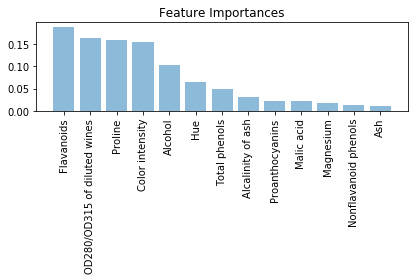

In [17]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('Forest-feature-importances.png', dpi=300)
plt.show()

From the above figure, we can see that "Flavanoids", "OD280/OD315 of diluted wines", "Proline", and "Color intensity" are the most important features to classify the Wine dataset. This may change if we choose a different number of trees T in a random foreest. For example, if we set T=10000, then the most important feature becomes "Color intensity."

### Feature Selection

By discarding the unimportant features, we can reduce the dimension of data points and compress data. For example, ZForest is a compressed 2-D dataset that contains only the most important two features "Flavanoids" and "OD280/OD315 of diluted wines:"

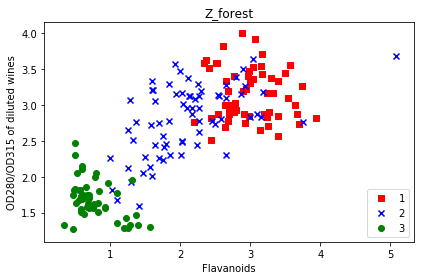

In [18]:
import matplotlib.pyplot as plt

Z_forest = X[['Flavanoids', 'OD280/OD315 of diluted wines']].values

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values==l, 0], 
                Z_forest[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('Important_Variable.png', dpi=300)
plt.show()

It is worth mentioning that Scikit-learn also implements a class called SelectFromModel that helps you select features based on a user-specified threshold, which is useful if we want to use the RandomForestClassifier as a feature selector. For example, we could set the threshold to 0.16 to get ZForest 

In [39]:
from sklearn.feature_selection import SelectFromModel

# put prefitted RandomForestClassifier "forest" into SelectFromModel
sfm = SelectFromModel(forest, threshold=0.16, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
